### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading DataSet (check format of Dataset like csv,xlsx...)

In [2]:
path = '/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv'
df = pd.read_csv(path)
df


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### Viewing DataSet
### Check what are dependent and indepndent columns

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Gives the inforamtion on data set.

### 1. How many columns are present.
### 2. What are the different datatypes that are present in different columns[Numerical or Categorical]
### 3. Check the number of entries present (this many rows are present in the dataset).
### 4. If there are any null values present in the data set.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Unnamed column consits of all unq values it is not much informative so we will drop

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


### 1. chechking the descriptive stats(5 pt summary i.e, min,max,25%,50%,75%)
### 2. comparing mean and median (to check if there are any outliers present in a column)
### 3.if there are any categorical columns check the number of unique values present and check its top and frequency.


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [7]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0) ] 

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### As dimensions cant be zero we will replace these values with medain

In [8]:
df['x'].replace(0,df['x'].median(),inplace=True)
df['y'].replace(0,df['y'].median(),inplace=True)
df['z'].replace(0,df['z'].median(),inplace=True)

### We can confirm that there are no  0 dimension values


In [9]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [10]:
df[df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [11]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


### Either impute or drop null values
### outliers should be imputed with mean
### Null values present in categorical column use mode for imputation
### If there are large percantage of missing values present in the column then drop it, else try to impute it.

In [12]:
df.isnull().sum() #we have missing values in only one column i.e, depth

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Check the percentage of missing columns

In [13]:
for i in df.columns:
    print('Precentage of missing values is {} % in {} '.format(round(
        (df[i].isnull().sum()/df.shape[0])*100,2),i))


Precentage of missing values is 0.0 % in carat 
Precentage of missing values is 0.0 % in cut 
Precentage of missing values is 0.0 % in color 
Precentage of missing values is 0.0 % in clarity 
Precentage of missing values is 2.58 % in depth 
Precentage of missing values is 0.0 % in table 
Precentage of missing values is 0.0 % in x 
Precentage of missing values is 0.0 % in y 
Precentage of missing values is 0.0 % in z 
Precentage of missing values is 0.0 % in price 


## Assigning median to missing values in depth column

In [14]:
m = df['depth'].median()
m

61.8

In [15]:
df['depth'] = df['depth'].fillna(m)

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

## This describes this is categorical ordinal data
### Within CUT Ideal is best and Fair is worst
### Within COLOR D is best and J is worst

In [18]:
df.groupby('cut').median().T  

/tmp/ipykernel_21/1468709082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cut').median().T


cut,Fair,Good,Ideal,Premium,Very Good
carat,1.00,0.84,0.54,0.83,0.72
depth,64.90,63.30,61.80,61.50,62.10
table,58.00,58.00,56.00,59.00,58.00
x,6.19,6.01,5.23,6.08,5.74
y,6.12,6.02,5.25,6.04,5.78
z,3.99,3.70,3.23,3.70,3.56
price,3348.00,3098.00,1761.00,3121.00,2637.00


In [19]:
df.groupby('color').median().T    

/tmp/ipykernel_21/2826860742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('color').median().T


color,D,E,F,G,H,I,J
carat,0.53,0.53,0.70,0.70,0.90,1.01,1.11
depth,61.80,61.80,61.80,61.80,61.90,61.90,61.90
table,57.00,57.00,57.00,57.00,57.00,57.00,58.00
x,5.21,5.22,5.62,5.65,6.13,6.37,6.65
y,5.22,5.23,5.62,5.65,6.13,6.36,6.65
z,3.21,3.22,3.45,3.49,3.80,3.94,4.11
price,1800.50,1698.00,2278.00,2274.00,3413.00,3749.00,4234.00


In [20]:
df.groupby('clarity').median().T


/tmp/ipykernel_21/4271451872.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('clarity').median().T


clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
carat,1.12,0.350,0.76,1.01,0.57,0.64,0.38,0.43
depth,62.10,61.700,61.90,61.90,61.80,61.80,61.80,61.80
table,58.00,56.000,57.00,58.00,57.00,57.00,57.00,57.00
x,6.66,4.570,5.86,6.43,5.33,5.55,4.67,4.85
y,6.62,4.585,5.86,6.42,5.34,5.55,4.70,4.87
z,4.13,2.800,3.61,3.98,3.28,3.40,2.87,2.99
price,3459.00,1063.500,2799.00,4077.00,1949.00,2066.00,1066.00,1253.00


### Data visualisation for categorical data

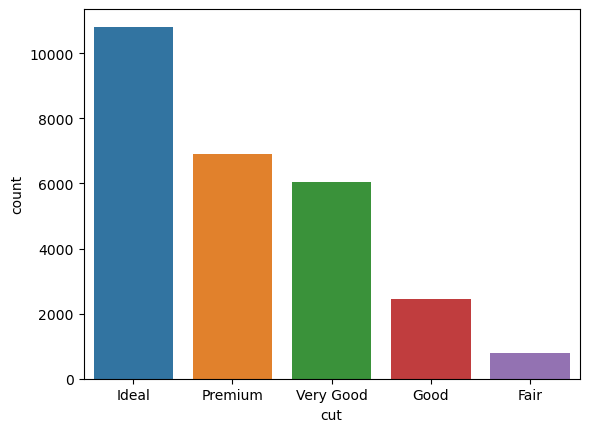

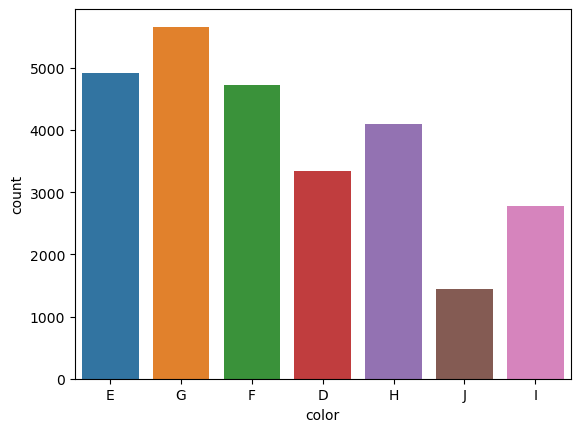

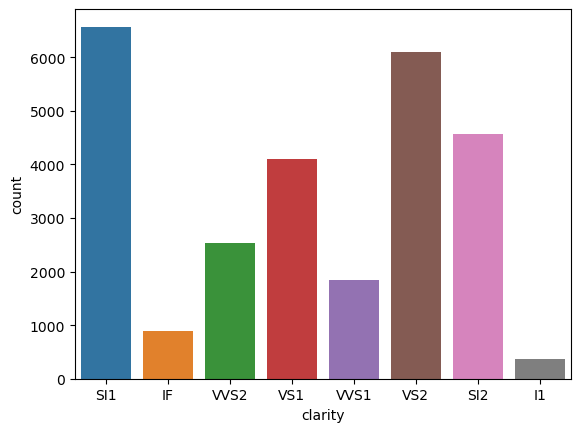

In [21]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=df[col])
    plt.show()

## Data visualisation for numeric data

<Axes: >

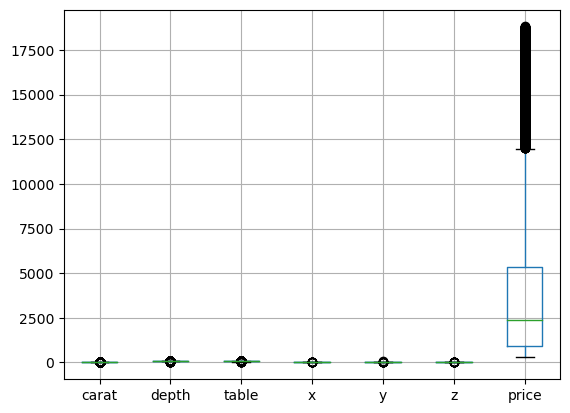

In [22]:
df.boxplot()

### Function for univariate data visualisation

In [23]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

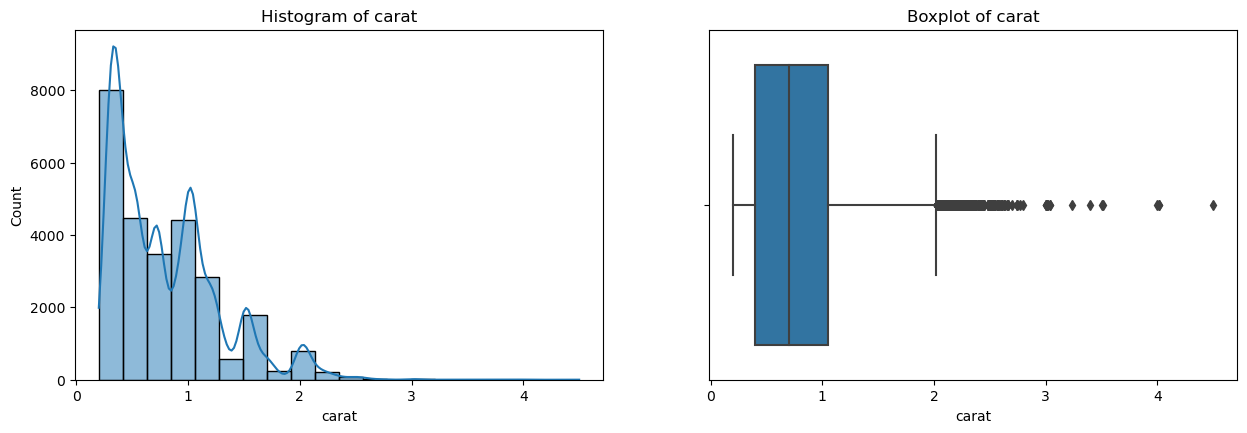

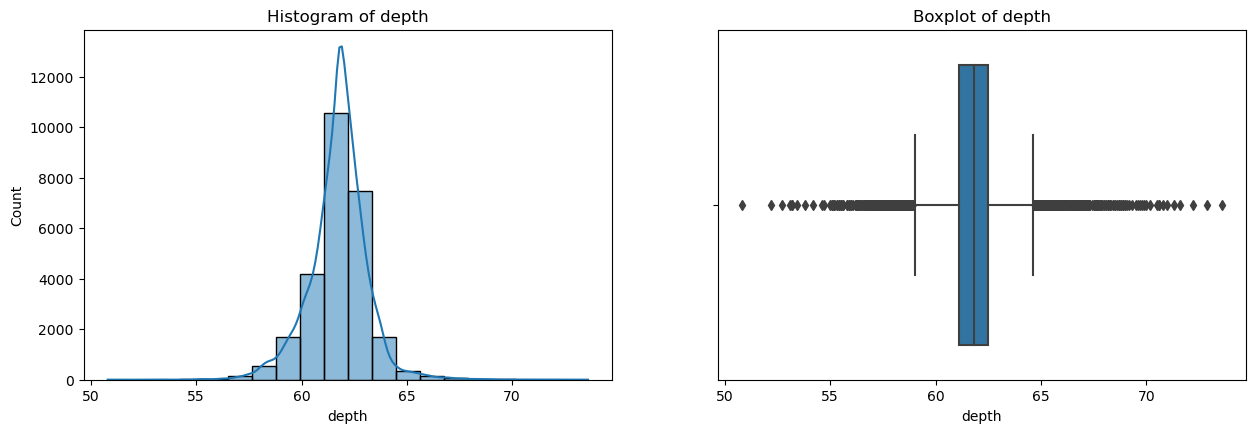

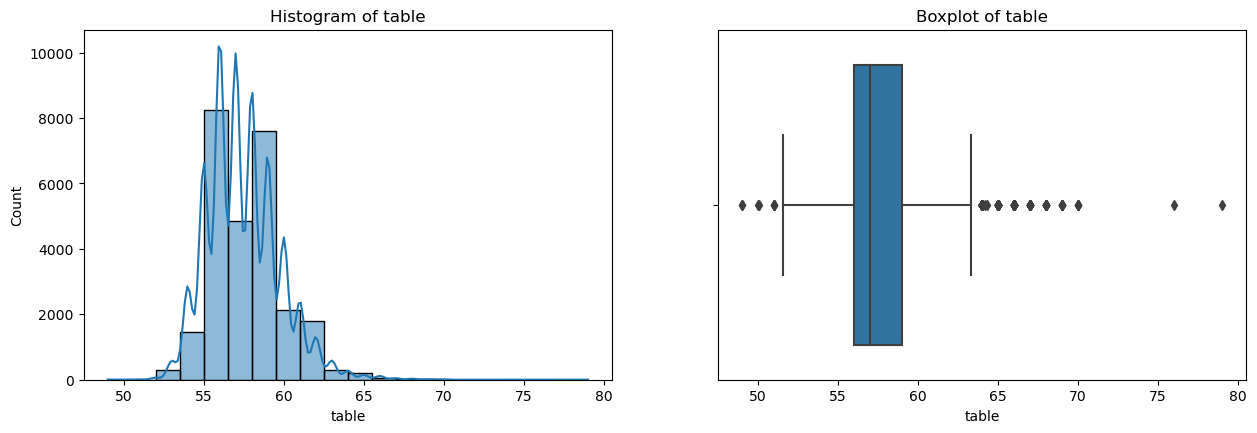

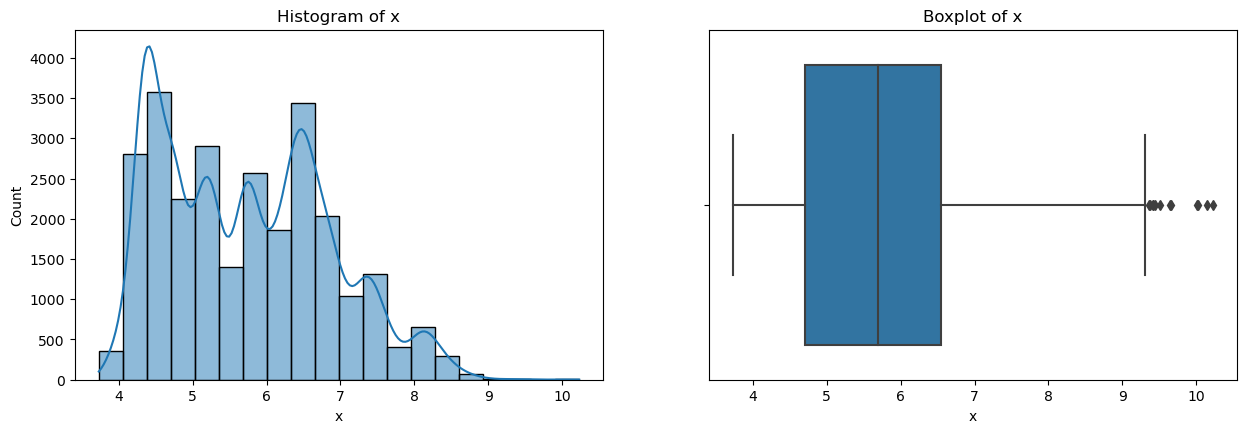

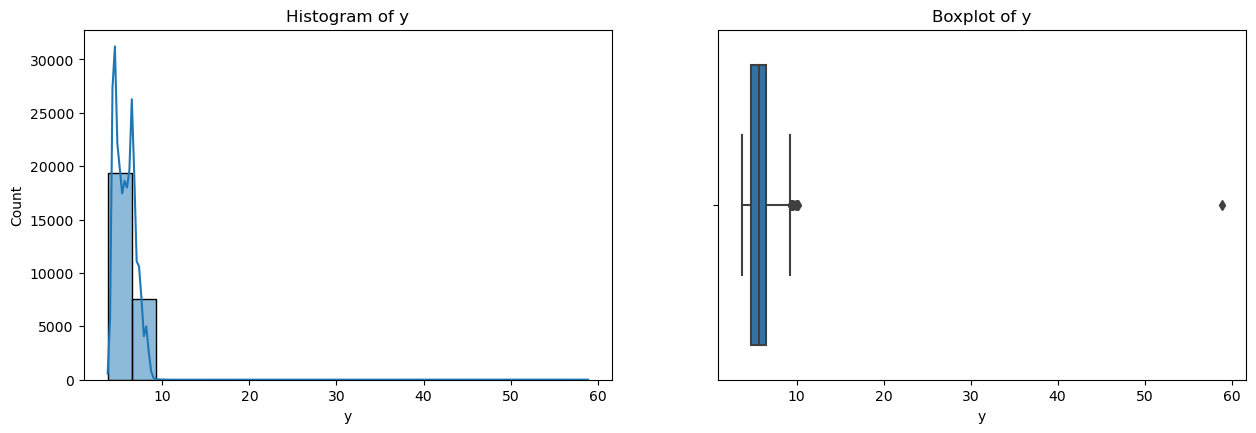

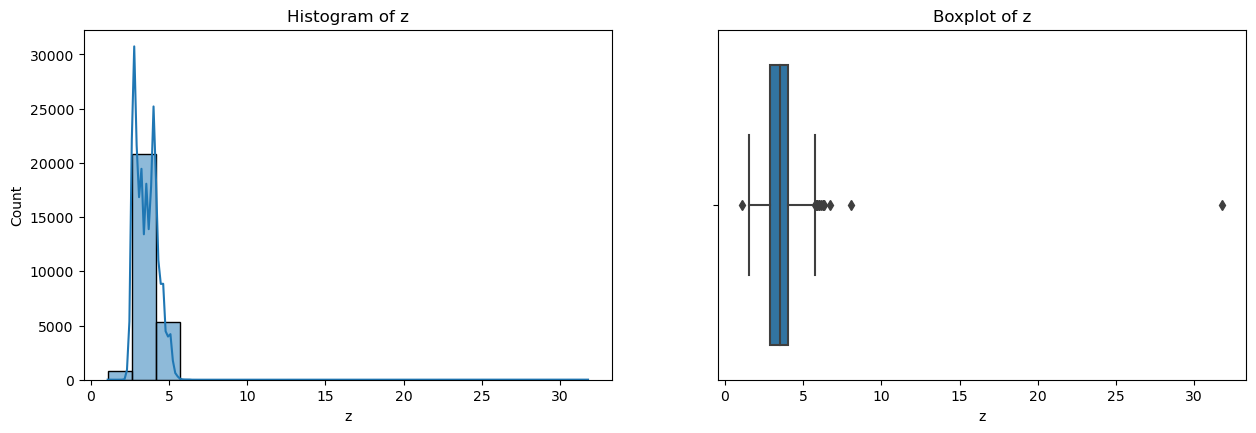

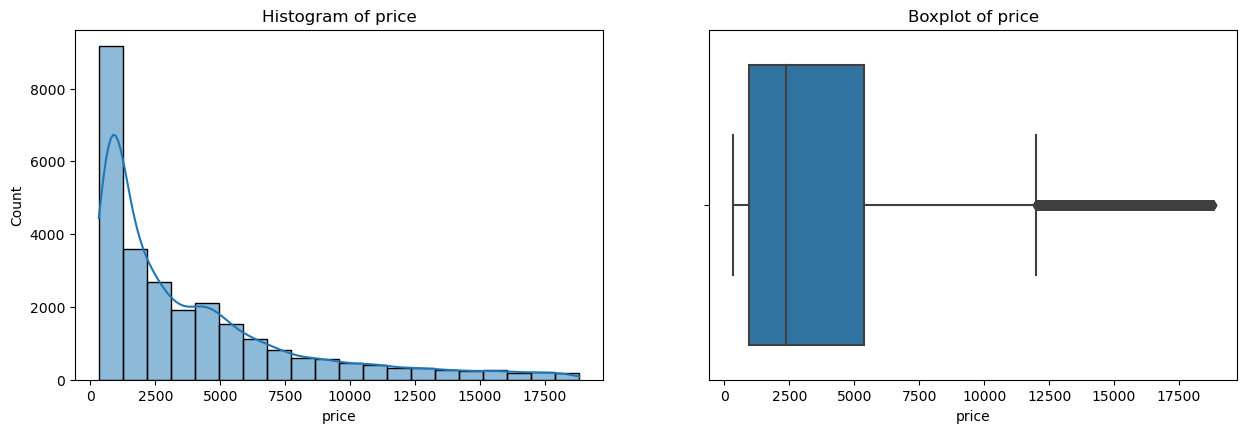

In [24]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

In [25]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    upper_count = df[df[col] > upper_range][col].count()
    upper_percentage = (upper_count/df.shape[0])*100
    lower_count = df[df[col] < lower_range][col].count()
    lower_percentage = (lower_count/df.shape[0])*100
    return print('Outlier percentage of {col} upper range is {upper}% and lower range is {lower}%\n'.format(col=col,upper=round(upper_percentage,2),lower=round(lower_percentage,2)))

In [26]:
for i in df.select_dtypes(exclude='object').columns:
    outliers_per(i)

Outlier percentage of carat upper range is 2.45% and lower range is 0.0%

Outlier percentage of depth upper range is 1.92% and lower range is 3.34%

Outlier percentage of table upper range is 1.15% and lower range is 0.03%

Outlier percentage of x upper range is 0.04% and lower range is 0.0%

Outlier percentage of y upper range is 0.04% and lower range is 0.0%

Outlier percentage of z upper range is 0.05% and lower range is 0.0%

Outlier percentage of price upper range is 6.6% and lower range is 0.0%



/tmp/ipykernel_21/3501603590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False,mask=np.triu(df.corr(),+1))


<Axes: >

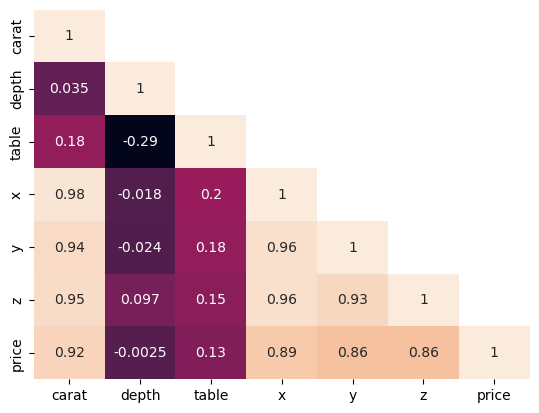

In [27]:
sns.heatmap(df.corr(),annot=True,cbar=False,mask=np.triu(df.corr(),+1))

## Bi variate Analysis
### It is done According to dependent col and categorical col
### Merging all nearby median values in price

<Axes: xlabel='cut', ylabel='price'>

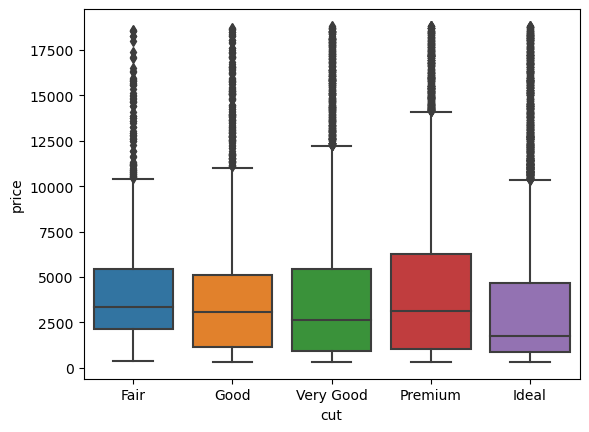

In [28]:
sns.boxplot(data=df,y='price',x='cut',order=['Fair','Good','Very Good','Premium','Ideal'])# Compare eith median columns

In [29]:
df.groupby('cut').median().T

/tmp/ipykernel_21/2050071662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cut').median().T


cut,Fair,Good,Ideal,Premium,Very Good
carat,1.00,0.84,0.54,0.83,0.72
depth,64.90,63.30,61.80,61.50,62.10
table,58.00,58.00,56.00,59.00,58.00
x,6.19,6.01,5.23,6.08,5.74
y,6.12,6.02,5.25,6.04,5.78
z,3.99,3.70,3.23,3.70,3.56
price,3348.00,3098.00,1761.00,3121.00,2637.00


In [30]:
df['cut'] = np.where(df['cut'] == 'Fair', 'Premium',df['cut'])# where ever the color is F, replace with G otherwise replace it with same
df['cut'] = np.where(df['cut'] == 'Very Good', 'Good',df['cut'])#This is Data Transformation

In [31]:
df['cut'].value_counts()

Ideal      10816
Good        8471
Premium     7680
Name: cut, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

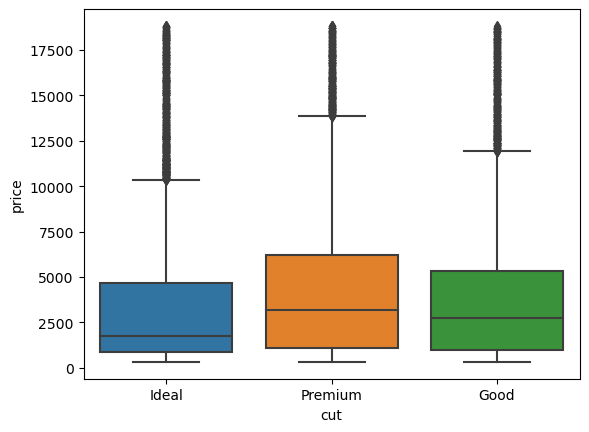

In [32]:
sns.boxplot(data=df,y='price',x='cut')

<Axes: xlabel='clarity', ylabel='price'>

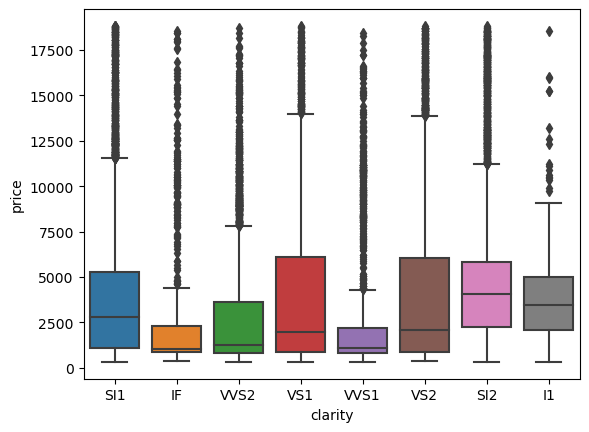

In [33]:
sns.boxplot(data=df,y='price',x='clarity')

In [34]:
df.groupby('clarity').median().T

/tmp/ipykernel_21/648690855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('clarity').median().T


clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
carat,1.12,0.350,0.76,1.01,0.57,0.64,0.38,0.43
depth,62.10,61.700,61.90,61.90,61.80,61.80,61.80,61.80
table,58.00,56.000,57.00,58.00,57.00,57.00,57.00,57.00
x,6.66,4.570,5.86,6.43,5.33,5.55,4.67,4.85
y,6.62,4.585,5.86,6.42,5.34,5.55,4.70,4.87
z,4.13,2.800,3.61,3.98,3.28,3.40,2.87,2.99
price,3459.00,1063.500,2799.00,4077.00,1949.00,2066.00,1066.00,1253.00


In [35]:
df['clarity'] = np.where(df['clarity'] == 'IF', 'VVS1',df['clarity'])
df['clarity'] = np.where(df['clarity'] == 'VS1', 'VS2',df['clarity'])

In [36]:
df['clarity'].value_counts()

VS2     10192
SI1      6571
SI2      4575
VVS1     2733
VVS2     2531
I1        365
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

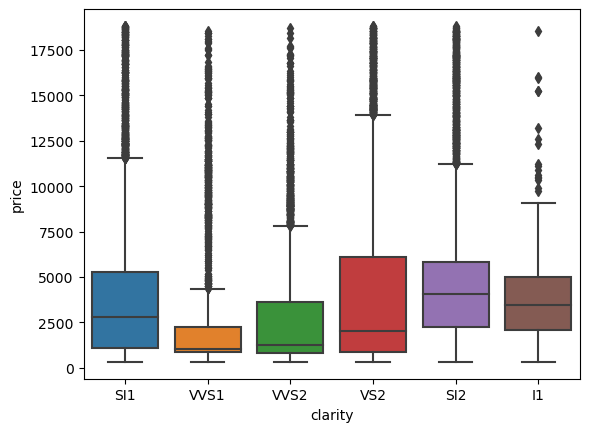

In [37]:
sns.boxplot(data=df,y='price',x='clarity')

<Axes: xlabel='color', ylabel='price'>

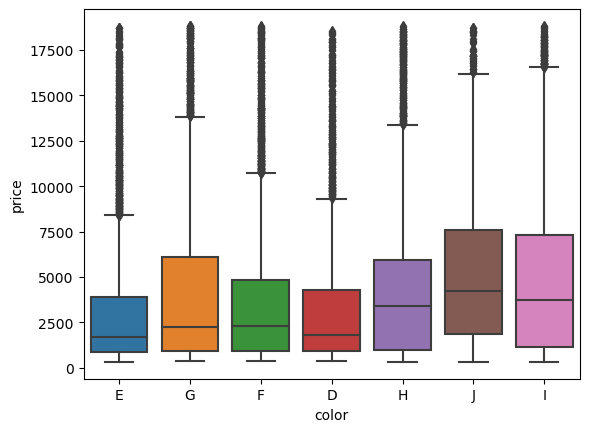

In [38]:
sns.boxplot(data=df,y='price',x='color') 

In [39]:
df.groupby('color').median().T

/tmp/ipykernel_21/543326328.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('color').median().T


color,D,E,F,G,H,I,J
carat,0.53,0.53,0.70,0.70,0.90,1.01,1.11
depth,61.80,61.80,61.80,61.80,61.90,61.90,61.90
table,57.00,57.00,57.00,57.00,57.00,57.00,58.00
x,5.21,5.22,5.62,5.65,6.13,6.37,6.65
y,5.22,5.23,5.62,5.65,6.13,6.36,6.65
z,3.21,3.22,3.45,3.49,3.80,3.94,4.11
price,1800.50,1698.00,2278.00,2274.00,3413.00,3749.00,4234.00


In [40]:
df['color'] = np.where(df['color'] == 'F','G',df['color']) 
df['color'] = np.where(df['color'] == 'D','E',df['color'])

In [41]:
df['color'].value_counts()

G    10390
E     8261
H     4102
I     2771
J     1443
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='price'>

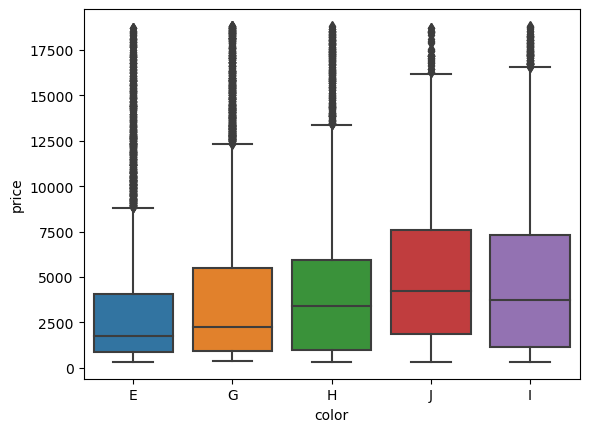

In [42]:
sns.boxplot(data=df,y='price',x='color') 

## Data Encoding -- Conversion of categorical col to numerical col
### For Nominal data we use "One Hot Encoding"
### For Ordinal data we use "Label Encoding"

In [43]:
df['color'] = np.where(df['color'] == 'E', '1',df['color'])#Method 1 for replacing
df['color'] = np.where(df['color'] == 'G', '2',df['color'])
df['color'] = np.where(df['color'] == 'H', '3',df['color'])
df['color'] = np.where(df['color'] == 'I', '4',df['color'])
df['color'] = np.where(df['color'] == 'J', '5',df['color'])

In [44]:
df['color'] = df['color'].astype('int')

In [45]:
df['cut'].replace(['Ideal','Premium','Good'],[1,2,3],inplace=True)# Method 2 for replacing

In [46]:
df['clarity'].replace(['VVS1','VVS2','VS2','SI1','SI2','I1'],[1,2,3,4,5,6],inplace=True)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.20,0.40,0.70,1.05,4.50
cut,26967.0,1.913042,0.841232,1.00,1.00,2.00,3.00,3.00
color,26967.0,2.211814,1.142909,1.00,1.00,2.00,3.00,5.00
clarity,26967.0,3.327029,1.198514,1.00,3.00,3.00,4.00,6.00
depth,26967.0,61.746564,1.394509,50.80,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.00,56.00,57.00,59.00,79.00
x,26967.0,5.730487,1.126897,3.73,4.71,5.69,6.55,10.23
y,26967.0,5.734204,1.164488,3.71,4.72,5.71,6.54,58.90
z,26967.0,3.539232,0.717718,1.07,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.00,945.00,2375.00,5360.00,18818.00


# Ready for Machine Learning 💪